In [1]:
import os
import pandas as pd
import numpy as np
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import json
from collections import namedtuple
import periodictable

#from string import maketrans
from pprint import pprint

In [2]:
data_dir = "./datas/meteorite_mineral_mapper/dataset_1_opaques/"

In [3]:
standard_dirs = list(filter(lambda d: d[:14] == "standards_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
mask_dirs = list(filter(lambda d: d[:4] != "obj1" and d[:4] != "obj2" and d[-8:]=="mask.tif",[d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj1_dirs = list(filter(lambda d: d[:9] == "obj1_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj2_dirs = list(filter(lambda d: d[:9] == "obj2_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))

In [4]:
standards = {}
for s in standard_dirs:
    tmp = s.split(".")[0].split("_")[-1]
    if (tmp == )
    standards[tmp] = io.imread(data_dir+s)
masks = {}
for m in mask_dirs:
    if ('rutile' in m):
        masks["TiO2"] = io.imread(data_dir+m)
    else:
        masks[m.split("std")[0].split("_")[0].split("-")[0]] = io.imread(data_dir+m)
obj1 = {}
for o in obj1_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj1[tmp] = io.imread(data_dir+o)

obj2 = {}
for o in obj2_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj2[tmp] = io.imread(data_dir+o)

In [5]:
def show(array, index):
    plt.imshow(array[index], cmap="gray")

In [57]:
masks.keys()

dict_keys(['NiS', 'Ni', 'SCOlv', 'FeS', 'Fe', 'CaTiO3', 'Fe3O4', 'TiO2'])

In [58]:
f = open('./parsed_weight')
parsed_weight = json.load(f)
weights = {}
for mask in masks.keys():
    weights[mask] = {}
    if mask == "SCOlv":
        for s in parsed_weight["10"].keys():
            if s in standards.keys():
                weights[mask][s] = parsed_weight["10"][s]/100
            else:
                weights[mask][standard] = 0
    else:
        for standard in standards.keys():
            d = dict((str(e), w) for e,w in periodictable.formula(mask).mass_fraction.items())
            if standard in mask:
                weights[mask][standard] = d[standard]
            else:
                weights[mask][standard] = 0
weights

{'NiS': {'Cr': 0,
  'Ni': 0.6466993688738453,
  'Si': 0,
  'Ca': 0,
  'S': 0.35330063112615473,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'Ni': {'Cr': 0,
  'Ni': 1.0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'SCOlv': {'Ti': 0,
  'Si': 0.19079999999999997,
  'Al': 0.0,
  'Fe': 0.0742,
  'Mg': 0.298,
  'Ca': 0.0002,
  'P': 0.0,
  'Cr': 0.0,
  'Ni': 0.0029,
  'S': 0.0},
 'FeS': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0.3647480377658969,
  'Al': 0,
  'P': 0,
  'Fe': 0.6352519622341031,
  'Mg': 0,
  'Ti': 0},
 'Fe': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 1.0,
  'Mg': 0,
  'Ti': 0},
 'CaTiO3': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0.29481430479788623,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0.3521102931224217},
 'Fe3O4': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0.723591407862219,
  'Mg': 0,
  'Ti': 0},
 'TiO2': {'Cr'

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [74]:
def mask(mask, standard):
    t = np.zeros_like(standard)
    for i in range(256):
        for j in range(512):
            if (mask[i][j]):
                t[i][j] = standard[i][j]
    return t

mask_maps = {}
for k in masks.keys():
    mask_maps[k] = {}
    for s in standards.keys():
        mask_maps[k][s] = mask(masks[k], standards[s])

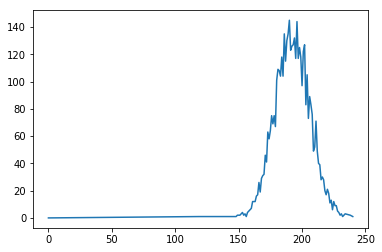

In [12]:
y = np.bincount(mask_maps['NiS']['Ni'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = [0] + xx[1:]
yy = [0] + yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

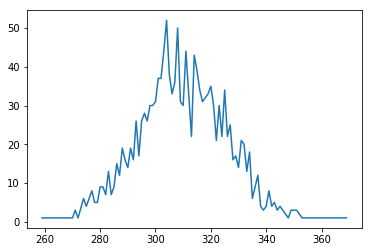

In [13]:
y = np.bincount(mask_maps['Ni']['Ni'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = xx[1:]
yy = yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

In [14]:
def average_std(mask, standard):
    t = 0
    d = mask_maps[mask][standard].flatten()
    ret_avg = d[d != 0].mean()
    red_std = d[d != 0].std()
    return ret_avg, red_std

In [ ]:
#Minyoung's garbage - can be deleted any time'
Compound_choice = input("What is the compound? ")
type(Compound_choice)
Element_choice = input("What is the element? ")
type(Element_choice)
with open('./parsed_weight') as f:
    data = json.load(f)
    
for kek in range(23): 
    if data[str(kek)]['Minerals']==Compound_choice:
        weight_percentage =  data[str(kek)][Element_choice]
        print (Element_choice + " weight perecentage:" + str(data[str(kek)][Element_choice]) + "%")
    
avg_ni,_=average_std('NiS', Element_choice )

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 255, 255)
ax.plot(x, x*( weight_percentage/avg_ni)) ;

In [22]:
mask_maps

{'NiS': {'Ni': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'S': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'Ni': {'Ni': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'SCOlv': {'S': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)},
 'FeS': {'S': arr

from model: 182.67876501225447
average: (192.22652885443583, 13.914124554256196)


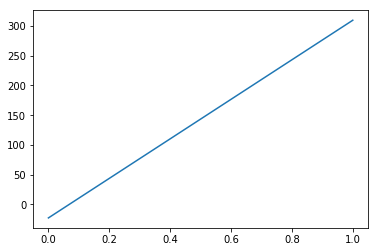

In [49]:
x = np.linspace(0, 1, 10000)
plt.plot(x, lin_models["Ni"](x))
print("from model: {}".format(lin_models["Ni"](0.618)))
print("average: {}".format(average_std("NiS","Ni")))

In [77]:
weights["NiS"].keys()

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [90]:
lin_models = {}
i = 0.00000001
for s in standards.keys():
    x = []
    y = []
    for m in masks.keys():
        dd = mask_maps[m][s].flatten()
        dd = dd[dd != 0]
        for d in dd: 
            if s in weights[m].keys():
                if (weights[m][s] != 0):
                    x.append(weights[m][s])
                else:
                    x.append(i)
                    i = i + 0.01
                    if (i > 0.03):
                        i = 0.01
            y.append(d)
    if (len(x)):
        lin_models[s] = np.poly1d(np.polyfit(y, x, 1))

from model: 0.9828809882011769
average: (192.22652885443583, 13.914124554256196)


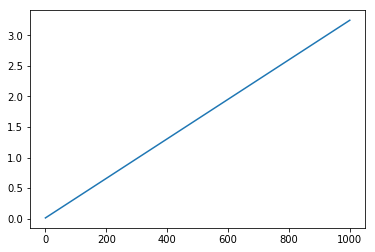

In [92]:
x = np.linspace(0, 1000, 10000)
plt.plot(x, lin_models["Ni"](x))
print("from model: {}".format(lin_models["Ni"](300)))
print("average: {}".format(average_std("NiS","Ni")))

In [52]:
standards.keys()

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [53]:
masks.keys()

dict_keys(['NiS', 'Ni', 'SCOlv', 'FeS', 'Fe', 'CaTiO3', 'Fe3O4', 'TiO2'])

In [89]:
plt.plot(x, lin_models["Ni"](x))

{'NiS': {'Cr': 0,
  'Ni': 0.6466993688738453,
  'Si': 0,
  'Ca': 0,
  'S': 0.35330063112615473,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'Ni': {'Cr': 0,
  'Ni': 1.0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'SCOlv': {'Ti': 0,
  'Si': 0.19079999999999997,
  'Al': 0.0,
  'Fe': 0.0742,
  'Mg': 0.298,
  'Ca': 0.0002,
  'P': 0.0,
  'Cr': 0.0,
  'Ni': 0.0029,
  'S': 0.0},
 'FeS': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0.3647480377658969,
  'Al': 0,
  'P': 0,
  'Fe': 0.6352519622341031,
  'Mg': 0,
  'Ti': 0},
 'Fe': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 1.0,
  'Mg': 0,
  'Ti': 0},
 'CaTiO3': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0.29481430479788623,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0.3521102931224217},
 'Fe3O4': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0.723591407862219,
  'Mg': 0,
  'Ti': 0},
 'TiO2': {'Cr'